In [1]:
# standard imports and setup
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, recall_score,precision_score

In [2]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('mushrooms.csv',na_values='?')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.shape

(8124, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
#Checking for duplicate rows
df[df.duplicated(subset=None, keep= 'first')==True]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [8]:
def understand_data(data) :
    
    return(pd.DataFrame({"Datatype":data.dtypes,
                         "No of NAs":data.isna().sum(),
                         "No of Levels":data.nunique(axis=0,dropna=True),
                         "Levels": data.apply(lambda x: str(x.unique()),axis=0)}))
understand_data(df)

,Datatype,No of NAs,No of Levels,Levels
class,object,0,2,['p' 'e']
cap-shape,object,0,6,['x' 'b' 's' 'f' 'k' 'c']
cap-surface,object,0,4,['s' 'y' 'f' 'g']
cap-color,object,0,10,['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises,object,0,2,['t' 'f']
odor,object,0,9,['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment,object,0,2,['f' 'a']
gill-spacing,object,0,2,['c' 'w']
gill-size,object,0,2,['n' 'b']
gill-color,object,0,12,['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']


Handling missing values

In [9]:
#Large amounts of missing values in stalk-root column. Therefore we can drop this column. 
df.drop(['stalk-root'],axis=1,inplace=True)

Handling Single value column

In [10]:
#Single value column - Viel Type. We can drop this column
df.drop(['veil-type'],axis=1,inplace=True)

Checking for balanced data

In [11]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [12]:
df['class'].value_counts(normalize=True)

e    0.517971
p    0.482029
Name: class, dtype: float64

Balanced dataset

In [13]:
# Check the summary statistics 
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


# EDA

In [14]:
column_list = list(df.columns.values)
column_list.remove('class')

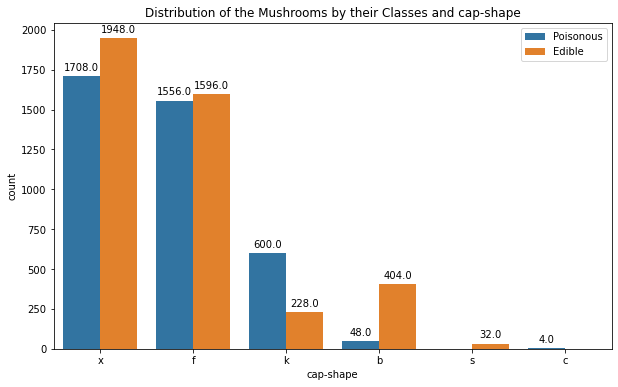

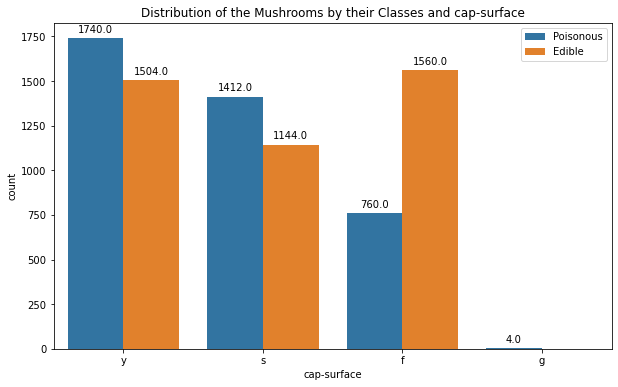

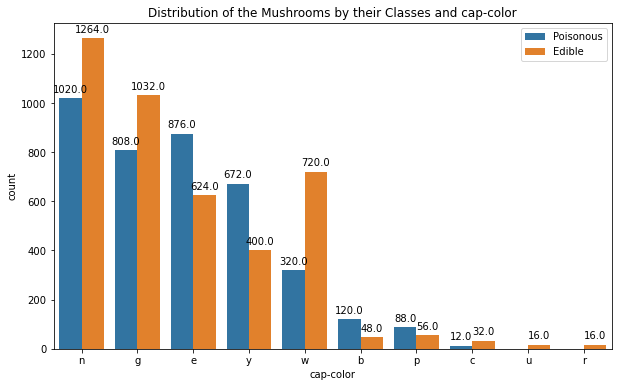

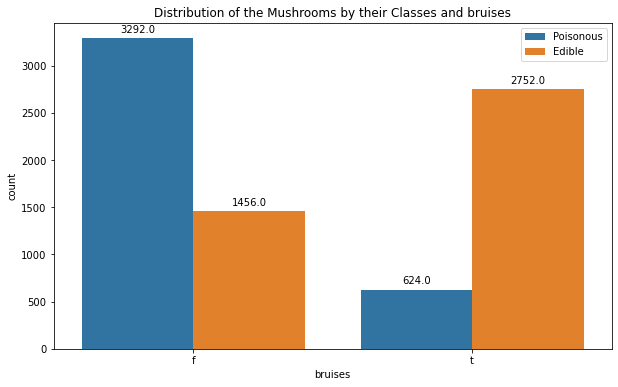

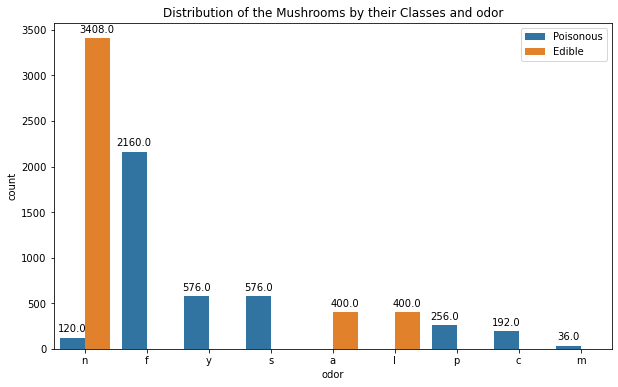

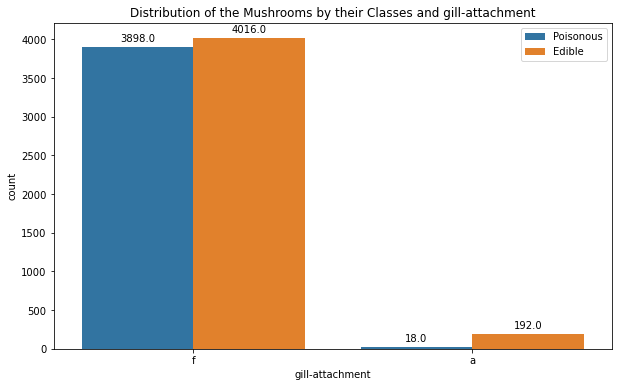

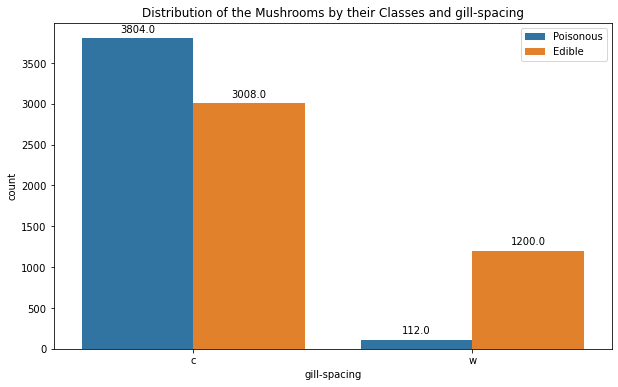

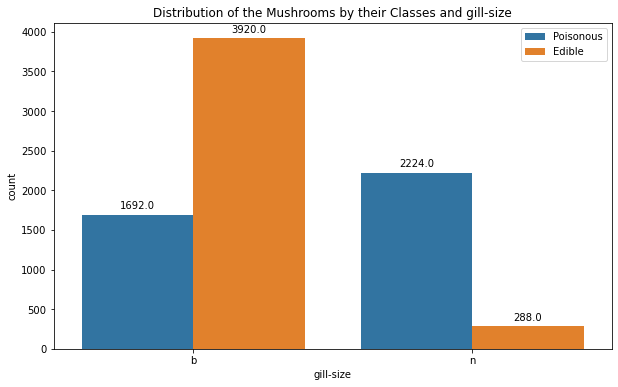

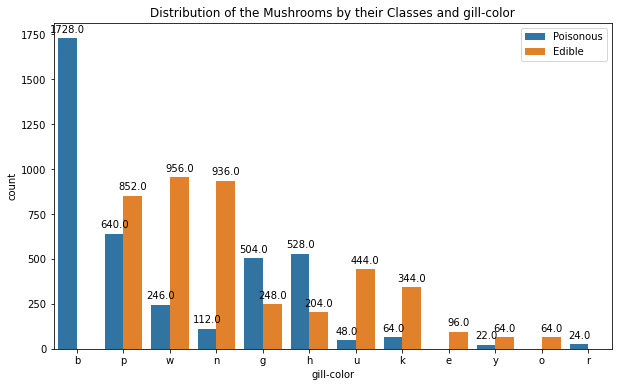

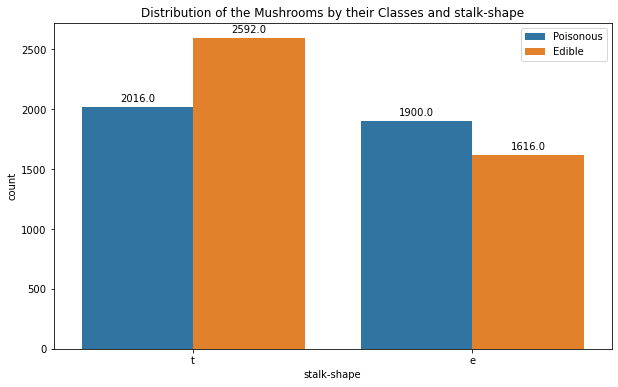

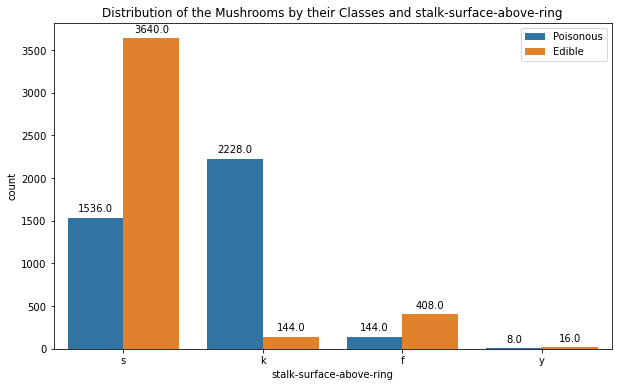

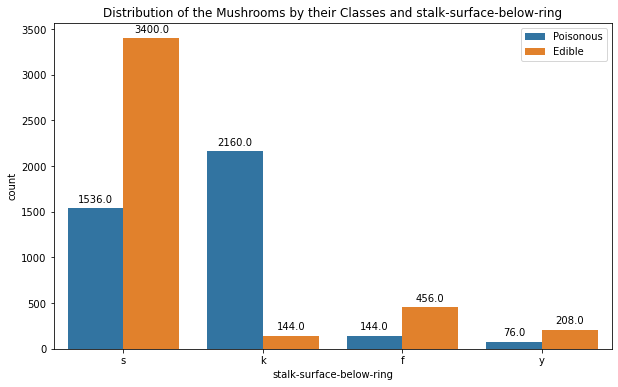

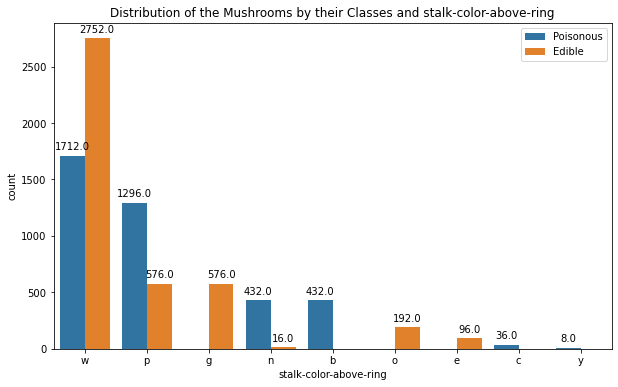

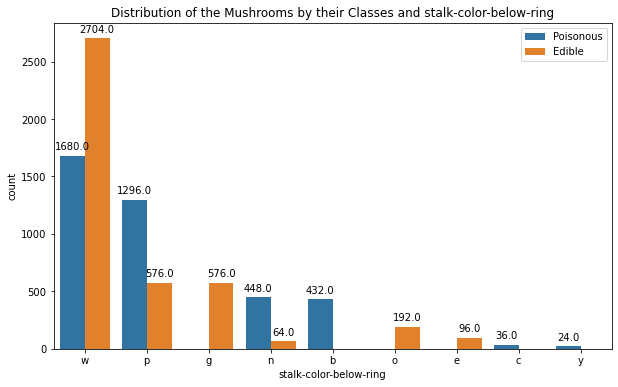

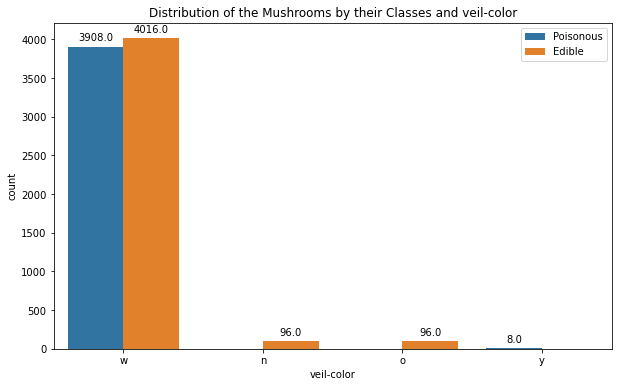

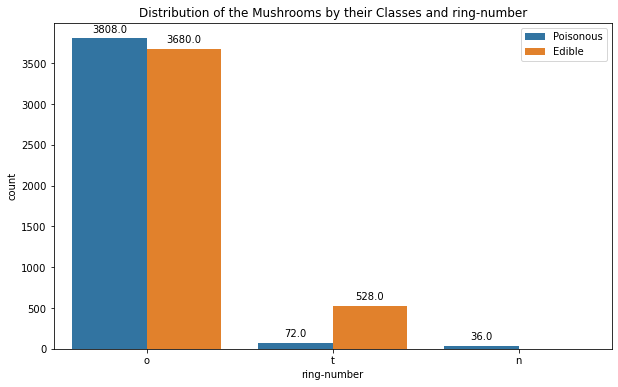

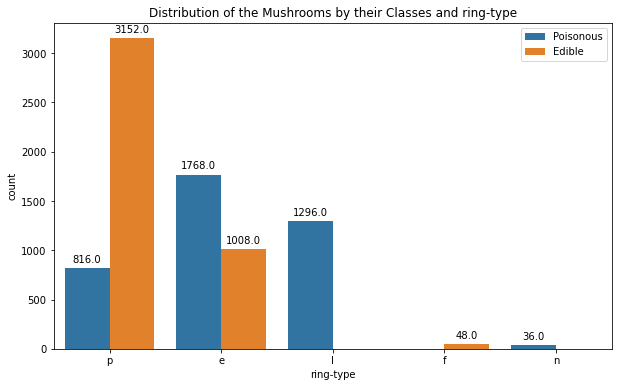

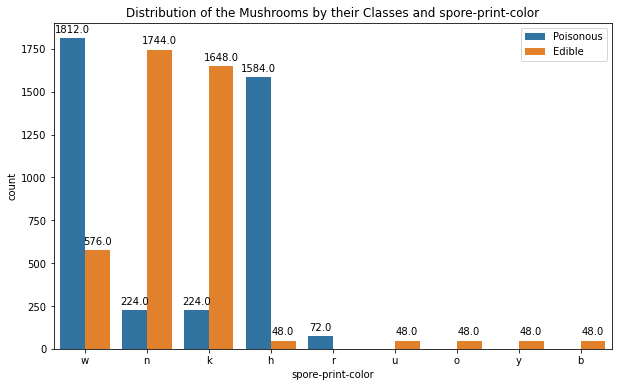

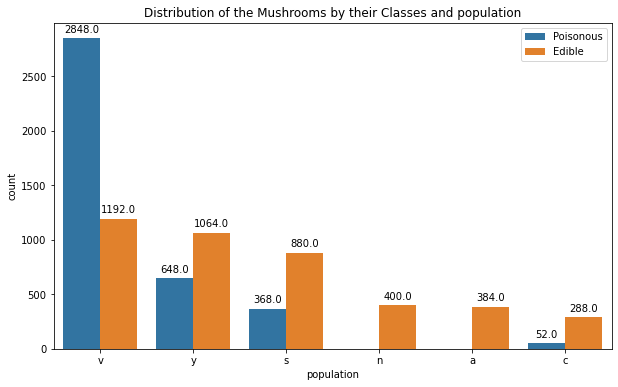

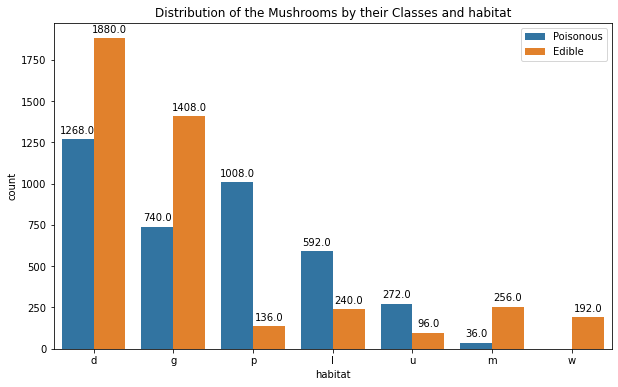

In [15]:
for i in column_list:
    plt.figure(figsize=(10, 6))
    splot = sns.countplot(data=df, x=i,hue='class',order = df[i].value_counts().index)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 9),
                       textcoords='offset points')
    plt.legend(['Poisonous', 'Edible'], loc='upper right')
    plt.title('Distribution of the Mushrooms by their Classes and {}'.format(i))
    plt.show()

# Statistical Significance

In [16]:
#Since target variable Class and independent variables are categorical
#We can use Chi-Square test to check the measure of Association

#Conduct the test we have to conduct 2 hypothesis. 
#Null Hypothesis H0 -  There is no relationship between the variables Class and independent variable [i]
#Alternative Hypotheis H1 -  There is relationship between variables Class and independent variable [i]

#If the p-value obtained after conducting the test is less than 0.05 we reject the Null hypothesis
#and accept the Alternate hypothesis 
#If the p-value is greater that 0.05 we fail to reject the Null hypothesis

In [17]:
import scipy.stats as st 
stat_value = []
for j in column_list: 
    crosstab = pd.crosstab(df['class'],df[j])
    print(crosstab)
    
    #using st.chi2_contigency()
    test_value,p_value,dof = st.chi2_contingency(crosstab)[0:3]
    print('Statistical value = ', test_value )
    print('p value = ', p_value )
    print('Degrees of freedom = ', dof ) 
    stat_value.append(test_value)
    if  p_value < 0.05:
        print('The p-value < 0.05 we reject the Null hypothesis and accept the Alternate hypothesis','\n',
              'There is dependency between variables class and {}'.format(j))
    else:
        print('The p-value > 0.05 we fail to reject the Null hypothesis','\n',
              'There is no dependency between variables class and {}'.format(j))

cap-shape    b  c     f    k   s     x
class                                 
e          404  0  1596  228  32  1948
p           48  4  1556  600   0  1708
Statistical value =  489.9199536189558
p value =  1.1964565685935438e-103
Degrees of freedom =  5
The p-value < 0.05 we reject the Null hypothesis and accept the Alternate hypothesis 
 There is dependency between variables class and cap-shape
cap-surface     f  g     s     y
class                           
e            1560  0  1144  1504
p             760  4  1412  1740
Statistical value =  315.0428312080377
p value =  5.518427038649143e-68
Degrees of freedom =  3
The p-value < 0.05 we reject the Null hypothesis and accept the Alternate hypothesis 
 There is dependency between variables class and cap-surface
cap-color    b   c    e     g     n   p   r   u    w    y
class                                                    
e           48  32  624  1032  1264  56  16  16  720  400
p          120  12  876   808  1020  88   0   0  320

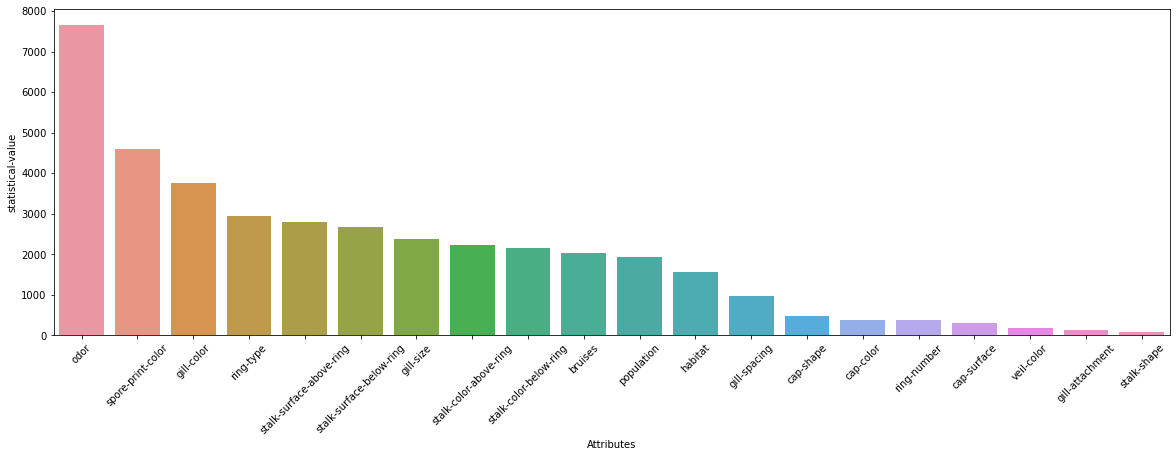

In [18]:
#Attributes associated with edibility
association = pd.DataFrame({'Attributes':column_list,
                            'statistical-value':stat_value}).sort_values('statistical-value',ascending=False)
plt.figure(figsize=(20, 6))
sns.barplot(x='Attributes',y='statistical-value',data=association)
plt.xticks(rotation = 45)
plt.show()

# Data Transformation

In [19]:
#Since the features are all nominal in nature, we have to do one hot encoding 
df_en= pd.get_dummies(df)

In [20]:
df_en.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
df_en.shape

(8124, 113)

# Feature selection

In [22]:
#Correlation study to for feature selection 
corr_matrix= df_en.corr()
 # Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.9 or less than 0.9
to_drop = [column for column in upper.columns if any(abs(upper[column] > 0.9))]
print(to_drop)

['stalk-color-above-ring_c', 'stalk-color-above-ring_o', 'stalk-color-below-ring_c', 'stalk-color-below-ring_o', 'veil-color_w', 'veil-color_y', 'ring-number_n', 'ring-type_n']


In [23]:
#defining the dependent and independent variables 
X = df_en.drop(['class_e','class_p','stalk-color-above-ring_c', 'stalk-color-above-ring_o', 
                'stalk-color-below-ring_c', 'stalk-color-below-ring_o', 'veil-color_w', 
                'veil-color_y', 'ring-number_n', 'ring-type_n'],axis=1)
y = df_en['class_p']

# Modelling

In [24]:
#Splitting the dataset into train and validation test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size = 0.3)

In [25]:
X_train.shape

(5686, 103)

In [26]:
X_test.shape

(2438, 103)

In [27]:
y_train.shape

(5686,)

In [28]:
y_test.shape

(2438,)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

Accuracy is the measure of how many observations our model correctly predicted over the total number of observations
Accuracy = (TP + TN) / (TP + TN + FP + FN)
For example, In a sample of hundreds of apples and oranges, the accuracy of the machine will be how many apples it classified correctly as apples and how many oranges it classified as not apples divided by the total number of apples and oranges. It is a simple and effective measurement as long as the number of apples and oranges are the same. ie balanced dataset. Otherwise, we may have to use a different evaluation metric.

Precision is how good the model is at predicting a specific category. Precision is the measure of how many observations our model correctly predicted over the amount of correct and incorrect predictions.

Precision = TP / (TP + FP)
Using our apple and oranges example, precision would measure the number of correctly classified apples divided by the apples correctly labeled as apples and the oranges incorrectly labeled as apples. In other words, precision measures how many of our classified apples were actually oranges.
Recall tells you how many times the model was able to detect a specific category over the total amount of observations.
Recall = TP / (TP + FN)
In our apples and oranges example, recall measures the amount apples labeled correctly divided by the total amount of apples present. In other words, recall measures how many apples we might have missed in the entire sample of fruit. -F1 Score
If we put our focus into one score, we might end up neglecting the other. In order to combat this we can use the F1 Score, which strikes a balance between the Precision and Recall scores. To calculate the F1 Score, you need to know the Precision and Recall scores and input them into the following formula:
F1 Score = 2 ( (Precision Recall) / (Precision + Recall) )
Using our apples and oranges example, F1 score will calculate a balance between Precision and Recall. It will measure the amount of misclassified oranges as apples (False Positives) and the amount of apples not correctly classified as apples (False Negatives).
Here we are trying to detect if our mushroom is poisonus or not.
- In this case, we would want to reduce the amount of False negatives because we hope to not miss any poison mushrooms in the batch.
- Recall would be the best evaluation metric to use here because it measures how many poison mushroom we might have missed.
- We would rather be safe than sorry.

# 1. Logistic Regression

In [30]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

y_predict=log_model.predict(X_test)

In [31]:
print("Results from logistic regression are as below")
log_result = classification_report(y_predict,y_test,output_dict=True)
log_result = pd.DataFrame(log_result).transpose()
log_result

Results from logistic regression are as below


,precision,recall,f1-score,support
0,1.000000,0.999205,0.999602,1258.00000
1,0.999153,1.000000,0.999576,1180.00000
accuracy,0.999590,0.999590,0.999590,0.99959
macro avg,0.999577,0.999603,0.999589,2438.00000
weighted avg,0.999590,0.999590,0.999590,2438.00000


In [41]:
con_matrix = pd.DataFrame(confusion_matrix( y_predict,y_test), columns=['Predicted Poison', 'Predicted Edible'], index=['Actual Poison', 'Actual Edible'])
con_matrix

,Predicted Poison,Predicted Edible
Actual Poison,1257,1
Actual Edible,0,1180


# 2.KNN

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9995898277276456, 0.9995898277276456, 0.9995898277276456, 0.9995898277276456, 0.9995898277276456, 0.9995898277276456, 0.9995898277276456, 0.9995898277276456, 0.9995898277276456, 0.9995898277276456]


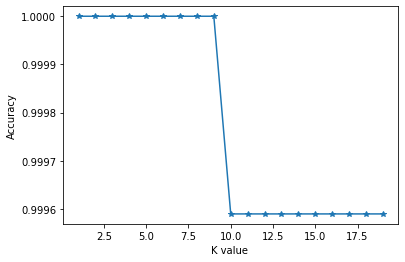

In [42]:
KNN_values=[]
neighbours=np.arange(1,20)
for k in neighbours:
    KNN=KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    KNN.fit(X_train,y_train)
    y_pred1=KNN.predict(X_test)
    acc=accuracy_score(y_test,y_pred1)
    KNN_values.append(acc)
print(KNN_values)   
plt.plot(neighbours,KNN_values,"*-")
plt.xlabel("K value ")
plt.ylabel("Accuracy")
plt.show()

In [43]:
KNN=KNeighborsClassifier(n_neighbors=1,metric="minkowski")
KNN.fit(X_train,y_train)
y_pred3=KNN.predict(X_test)

print("Results from KNN are as below")
KNN_result = classification_report(y_pred3,y_test,output_dict=True)
KNN_result = pd.DataFrame(KNN_result).transpose()
KNN_result

Results from KNN are as below


,precision,recall,f1-score,support
0,1.0,1.0,1.0,1257.0
1,1.0,1.0,1.0,1181.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,2438.0
weighted avg,1.0,1.0,1.0,2438.0


# 3. Decision Tree

In [44]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred4 = DT.predict(X_test)

In [45]:
print("Results from Decision Tree are as below")
DT_result = classification_report(y_pred4,y_test,output_dict=True)
DT_result = pd.DataFrame(DT_result).transpose()
DT_result

Results from Decision Tree are as below


,precision,recall,f1-score,support
0,1.0,1.0,1.0,1257.0
1,1.0,1.0,1.0,1181.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,2438.0
weighted avg,1.0,1.0,1.0,2438.0


# 4.Random Forest

In [46]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train) 
y_pred5 = RF.predict(X_test)

In [47]:
print("Results from Random Forest are as below")
RF_result = classification_report(y_pred5,y_test,output_dict=True)
RF_result = pd.DataFrame(RF_result).transpose()
RF_result

Results from Random Forest are as below


,precision,recall,f1-score,support
0,1.0,1.0,1.0,1257.0
1,1.0,1.0,1.0,1181.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,2438.0
weighted avg,1.0,1.0,1.0,2438.0


# 5. Gaussian Naive Bayes

In [48]:
#Gaussian Naive Bayes  - Need to have features which are independent.
#We have eliminated features that highly correlated. 
#It is used for numerical / continuous features. The distribution of continues values 
#are "assumed" to be Gaussian. And therefore the likelihood probabilities are computed based 
#on Gaussian distribution.
#In our case, predictor features are not continuous. So Gaussian is not a good algorithm for this dataset. 

GNB=GaussianNB()
GNB_model=GNB.fit(X_train , y_train)
y_pred6=GNB_model.predict(X_test)

In [49]:
print("Results from Gaussian Naive bayer are as below")
GNB_result = classification_report(y_pred6,y_test,output_dict=True)
GNB_result = pd.DataFrame(GNB_result).transpose()
GNB_result

Results from Gaussian Naive bayer are as below


,precision,recall,f1-score,support
0,0.860780,0.999077,0.924786,1083.00000
1,0.999153,0.870849,0.930599,1355.00000
accuracy,0.927810,0.927810,0.927810,0.92781
macro avg,0.929966,0.934963,0.927693,2438.00000
weighted avg,0.937685,0.927810,0.928017,2438.00000


In [50]:
con_matrix = pd.DataFrame(confusion_matrix( y_pred6,y_test), columns=['Predicted Poison', 'Predicted Edible'], index=['Actual Poison', 'Actual Edible'])
con_matrix

,Predicted Poison,Predicted Edible
Actual Poison,1082,1
Actual Edible,175,1180


# 6. BernoulliNB

In [51]:
#The predictors in this data are boolean variables. BernoulliNB algorithm is suitable for this dataset.

from sklearn.naive_bayes import BernoulliNB
BNB_model = BernoulliNB()
BNB_model = BNB_model.fit(X_train , y_train)
y_pred7=BNB_model.predict(X_test)

In [52]:
print("Results from Bernoulli Naive bayer are as below")
BNB_result = classification_report(y_pred7,y_test,output_dict=True)
BNB_result = pd.DataFrame(BNB_result).transpose()
BNB_result

Results from Bernoulli Naive bayer are as below


,precision,recall,f1-score,support
0,0.990453,0.904797,0.945689,1376.000000
1,0.889077,0.988701,0.936246,1062.000000
accuracy,0.941345,0.941345,0.941345,0.941345
macro avg,0.939765,0.946749,0.940968,2438.000000
weighted avg,0.946294,0.941345,0.941576,2438.000000


In [53]:
con_matrix = pd.DataFrame(confusion_matrix( y_pred7,y_test), columns=['Predicted Poison', 'Predicted Edible'], index=['Actual Poison', 'Actual Edible'])
con_matrix

,Predicted Poison,Predicted Edible
Actual Poison,1245,131
Actual Edible,12,1050


In [54]:
#Hyperparameter tuning of Bernoulli
alphas = {'alpha': [1.0e-300,1.0e-200,1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}

# setup grid search
grid_nb = GridSearchCV(estimator = BernoulliNB(binarize = None),
                       param_grid = alphas, cv = 5, scoring = 'recall')

# fit nb
grid_nb.fit(X_train , y_train) 

NameError: name 'GridSearchCV' is not defined

In [55]:
# check best estimator result
grid_nb.best_estimator_

NameError: name 'grid_nb' is not defined

In [56]:
BNB_model1 = BernoulliNB(alpha=1e-300, binarize=None )
BNB_model1 = BNB_model1.fit(X_train , y_train)
y_pred8=BNB_model.predict(X_test)

In [57]:
print("Results from Bernoulli Naive bayer-HT are as below")
BNB_result1 = classification_report(y_pred8,y_test,output_dict=True)
BNB_result1 = pd.DataFrame(BNB_result1).transpose()
BNB_result1

Results from Bernoulli Naive bayer-HT are as below


,precision,recall,f1-score,support
0,0.990453,0.904797,0.945689,1376.000000
1,0.889077,0.988701,0.936246,1062.000000
accuracy,0.941345,0.941345,0.941345,0.941345
macro avg,0.939765,0.946749,0.940968,2438.000000
weighted avg,0.946294,0.941345,0.941576,2438.000000


In [59]:
#using
print('Model,Accuracy,Recall')
print('Logistic Regression: ',accuracy_score(y_predict,y_test),recall_score(y_predict,y_test))

print('KNN: ',accuracy_score(y_pred3,y_test), recall_score(y_pred3,y_test))
print('DT: ',accuracy_score(y_pred4,y_test), recall_score(y_pred4,y_test))
print('Random Forest: ',accuracy_score(y_pred5,y_test), recall_score(y_pred5,y_test))
print('Gaussian Naive bayer: ',accuracy_score(y_pred6,y_test), recall_score(y_pred6,y_test))
print('Bernoulli Naive bayer: ',accuracy_score(y_pred7,y_test), recall_score(y_pred7,y_test))
print('Bernoulli Naive bayer-HT: ',accuracy_score(y_pred8,y_test), recall_score(y_pred8,y_test))

Model,Accuracy,Recall
Logistic Regression:  0.9995898277276456 1.0
KNN:  1.0 1.0
DT:  1.0 1.0
Random Forest:  1.0 1.0
Gaussian Naive bayer:  0.9278096800656276 0.8708487084870848
Bernoulli Naive bayer:  0.9413453650533224 0.9887005649717514
Bernoulli Naive bayer-HT:  0.9413453650533224 0.9887005649717514
